## Functions

In [1]:
# Old Strategy

import scipy.stats as st
import numpy as np
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive('True')
'exec(%matplotlib inline)'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from forex_python.converter import get_rate
from datetime import datetime, date 
import time 

# Basic data collection functions
def getPrice(ticker, start='2013-08-07', end='2019-10-17'):
    df = dr.data.get_data_yahoo(ticker, start, end)
    df.info()
    return df['Adj Close']

def logRet(df):
    # Plots daily returns
    pri = df
    daily_returns = pri * 0
    for i in range(1, len(pri)):
        daily_returns[i] = np.log(pri[i]/pri[i-1])
    return daily_returns

# For a portfolio's returns, gives the index
def indx(ret):
    ind = ret * 0
    ind += 100
    for i in range(1, len(ret)):
        ind[i] = ind[i-1] * (1+ret[i])
    return ind

# Cumulative returns

def cumRet(rets):
    cumR = rets * 0 
    for t in range(1, len(cumR)):
        cumR[t] = cumR[t-1] + rets[t]
    return cumR

def plotCumRet(cumR):
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.plot(cumR)
    ax.set_xlabel('Month')
    ax.set_ylabel('% Return')
    ax.set_title('Cumulative Return')
    plt.show()

def plotCumRets(rets):
    c = cumRet(rets)
    plotCumRet(c)

# Risk metric functions

def maxDrawdown(pri, window=252):
    Roll_Max = pri.rolling(window, min_periods=200).max()
    Daily_Drawdown = pri/Roll_Max - 1.0
    Daily_Drawdown *= -1
    Max_Daily_Drawdown = np.max(Daily_Drawdown)
    print("Max daily drawdown: {}%".format(round(Max_Daily_Drawdown, 2)))
    return Max_Daily_Drawdown

def plotDrawdown(pri, window=252):
    Roll_Max = pri.rolling(window, min_periods=200).max()
    Daily_Drawdown = pri/Roll_Max - 1.0
    Daily_Drawdown *= -1
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.plot(Daily_Drawdown)
    ax.set_xlabel('Year')
    ax.set_ylabel('%')
    ax.set_title('Drawdown')
    plt.show()

def valueAR(dailyRet, per): #Historical
    pci = np.percentile(dailyRet, per)
    print("VaR at {0}%: {1}%".format(per, round(-100*pci, 3)))
    return pci

def cVAR(dailyRet, per):
    pci = np.percentile(dailyRet, per)
    sumBad = 0
    t = 0
    for i in range(1, len(dailyRet)):
        if dailyRet[i] <= pci:
            t += 1
            sumBad += dailyRet[i]
    if t > 0:
        condVaR = sumBad / t
    else:
        condVaR = 0
    print("CVaR at {0}%: {1}%".format(per, round(-100*condVaR, 3)))
    return condVaR

def semiv(dayRet, port=False):
    m = np.mean(dayRet)
    low = []
    for i in range(1, len(dayRet)):
        if dayRet[i] <= m:
            low.append(dayRet[i])
    stand = np.std(low)
    if port: 
        stand *= np.sqrt(21)
    print("SemiSD: {}".format(round(stand, 6)))
    return stand

# Use pricing data
def max_drawdown(X):
    mdd = 0
    peak = X[0]
    for i in range(1, len(X)):
        if X[i] > peak:
            peak = X[i]
        dd = (peak - X[i]) / peak
        if dd > mdd:
            mdd = dd
    return mdd

# SD, SemiV, Drawdown, VaR, CVaR, Skewness, Kurtosis
def riskMetrics(ret, name = "portfolio", varP = 5, cvarP = 5):
    print("Risk metrics for {}".format(name))
    pri = indx(ret)
    print("Average return: {}%".format(round(100*np.mean(ret), 6)))
    sd = np.std(ret)
    print("SD: {}".format(round(sd, 6)))
    semiv(ret)
    dd = max_drawdown(pri)
    print("Max DD: {}%".format(round(100*dd, 2)))
    valueAR(ret, varP)
    cVAR(ret, cvarP)
    sk = st.skew(ret)
    print("Skewness: {}".format(round(sk, 6)))
    kurt = st.kurtosis(ret)
    print("Kurtosis: {}".format(round(kurt+3, 6)))
    print("Excess Kurtosis: {}".format(round(kurt, 6)))
    print("")
    
def cVARNP(dailyRet, per):
    pci = np.percentile(dailyRet, per)
    sumBad = 0
    t = 0
    for i in range(1, len(dailyRet)):
        if dailyRet[i] <= pci:
            t += 1
            sumBad += dailyRet[i]
    if t > 0:
        condVaR = sumBad / t
    else:
        condVaR = 0
    print("CVaR at {0}%: {1}%".format(per, np.round(float(-100*condVaR), 3)))
    return condVaR

def riskMetricsNP(ret, name = "portfolio", varP = 5, cvarP = 5, port=False):
    print("Risk metrics for {}".format(name))
    pri = indx(ret)
    print("Average return: {}%".format(round(100*np.mean(ret), 6)))
    sd = np.std(ret)
    # Note change for monthly to work for portfolio 
    if port: 
        print("SD: {}".format(np.round(sd*np.sqrt(21), 6)))
    else: 
        print("SD: {}".format(np.round(sd, 6)))
    semiv(ret, port=True)
    dd = max_drawdown(pri)
    print("Max DD: {}%".format(np.round(float(100*dd), 2)))
    valueAR(ret, varP)
    cVARNP(ret, cvarP)
    sk = st.skew(ret)
    print("Skewness: {}".format(np.round(float(sk), 6)))
    kurt = st.kurtosis(ret)
    print("Kurtosis: {}".format(round(kurt+3, 6)))
    print("Excess Kurtosis: {}".format(np.round(float(kurt), 6)))
    print("")
    
def getCSVPrice(t, start='2018-1-1', end='2020-1-1'): 
    prices = dfP.loc[start : end, t].values
    return prices

def getCSVRet(t, start='2018-1-1', end='2020-1-1'): 
    rets = dfRet.loc[start : end, t].values
    return rets 

def strip_replace(x):
    return x.strip("'").strip('[').strip(']').strip().replace("'", "").split(', ')

def sameMonth(d): 
    ld = d.index.max()
    lm = ld.month
    ly = ld.year
    td = date.today()
    tm = td.month
    ty = td.year
    if (lm, ly) != (tm, ty): 
        print('Not the same')
        error
    return 0

/Users/Chris/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Tickers

In [2]:
#Alternative Energy
sym_AltEn=["NLR","FAN","PBD","TAN"]
#Consumer
sym_Cons=["PBS","PBJ","PEJ","PMR","BJK","XHB","CARZ"]
#Energy
sym_Ener=["PXE","FRAK","PXJ"]
#Financials
sym_Fina=["KBWP","IAI","PSP","KBWR","KBWB"]
#Healtcare
sym_Heal=["IHI","IHF","PBE","PJP"]
#Industrials &amp;Infrastructure
sym_Indu=["GII","PIO","PPA","IYT","SEA", "JETS"]
#Materials, Metals and Mining
sym_Mate=["HAP","GDX","GDXJ","KOL","SLX","XME"]
#Technology
sym_Tech=["PSJ","SKYY","PXQ","PNQI","PSI","SOCL","FONE","ROBO", "ESPO"]
#Utilities
sym_Util= ["GRID"]
# Add ESPO for esports ETF 

#Combining all symbols
sym_all=sym_AltEn+sym_Cons+sym_Ener+sym_Fina+sym_Heal+sym_Indu+sym_Mate+sym_Tech+sym_Util

tickers = sym_all
tickers.append('VTV')
tickers.append('SPY')
weights = np.zeros(len(tickers))
prices = 10 * np.ones(len(tickers))

print(tickers, '\n\n', weights, '\n\n', prices)

['NLR', 'FAN', 'PBD', 'TAN', 'PBS', 'PBJ', 'PEJ', 'PMR', 'BJK', 'XHB', 'CARZ', 'PXE', 'FRAK', 'PXJ', 'KBWP', 'IAI', 'PSP', 'KBWR', 'KBWB', 'IHI', 'IHF', 'PBE', 'PJP', 'GII', 'PIO', 'PPA', 'IYT', 'SEA', 'JETS', 'HAP', 'GDX', 'GDXJ', 'KOL', 'SLX', 'XME', 'PSJ', 'SKYY', 'PXQ', 'PNQI', 'PSI', 'SOCL', 'FONE', 'ROBO', 'ESPO', 'GRID', 'VTV', 'SPY'] 

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [3]:
try: 
    dfList = pd.read_csv(open('WML_Old.csv')).dropna()
    dfList['StartF'] = pd.to_datetime(dfList['StartF'], format='%Y-%m-%d').dt.date
    dfList['EndF'] = pd.to_datetime(dfList['EndF'], format='%Y-%m-%d').dt.date
    dfList['StartH'] = pd.to_datetime(dfList['StartH'], format='%Y-%m-%d').dt.date
    dfList['EndH'] = pd.to_datetime(dfList['EndH'], format='%Y-%m-%d').dt.date
    dfList['StartS'] = pd.to_datetime(dfList['StartS'], format='%Y-%m-%d').dt.date
    dfList['EndS'] = pd.to_datetime(dfList['EndS'], format='%Y-%m-%d').dt.date
    if int(dfList['EndH'].iloc[-1].month) != int(date.today().month)-1 or dfList['StartF'].duplicated().sum() != 0:
        print('Refreshing WML_Old.csv...')
        # Really need to be careful here with the dfList outcome 
        try: 
            import old_strategy_get_universe
            print('')
        except: 
            print('\n\nold_strategy_get_universe.py missing or failing to update WML_Old.csv\n')

        print('Trying existing WML_Old.csv...')
        dfList = pd.read_csv(open('WML_Old.csv')).dropna()
        dfList['StartF'] = pd.to_datetime(dfList['StartF'], format='%Y-%m-%d').dt.date
        dfList['EndF'] = pd.to_datetime(dfList['EndF'], format='%Y-%m-%d').dt.date
        dfList['StartH'] = pd.to_datetime(dfList['StartH'], format='%Y-%m-%d').dt.date
        dfList['EndH'] = pd.to_datetime(dfList['EndH'], format='%Y-%m-%d').dt.date
        dfList['StartS'] = pd.to_datetime(dfList['StartS'], format='%Y-%m-%d').dt.date
        dfList['EndS'] = pd.to_datetime(dfList['EndS'], format='%Y-%m-%d').dt.date

except: 
    try: 
        import old_strategy_get_universe
        print('')
    except: 
        print('\n\nold_strategy_get_universe.py missing or failing to update WML_Old.csv\n')

    print('Trying existing WML_Old.csv...')
    dfList = pd.read_csv(open('WML_Old.csv')).dropna()
    dfList['StartF'] = pd.to_datetime(dfList['StartF'], format='%Y-%m-%d').dt.date
    dfList['EndF'] = pd.to_datetime(dfList['EndF'], format='%Y-%m-%d').dt.date
    dfList['StartH'] = pd.to_datetime(dfList['StartH'], format='%Y-%m-%d').dt.date
    dfList['EndH'] = pd.to_datetime(dfList['EndH'], format='%Y-%m-%d').dt.date
    dfList['StartS'] = pd.to_datetime(dfList['StartS'], format='%Y-%m-%d').dt.date
    dfList['EndS'] = pd.to_datetime(dfList['EndS'], format='%Y-%m-%d').dt.date
    print('\n\nold_strategy_get_universe.py missing or failing to update WML_Old.csv\n')

        
if dfList['StartF'].duplicated().sum() != 0: 
    print('\n\nDuplicate value issue in WML_Old.csv\n\n')
    error 

try:
    print('Importing prices...')
    dfP = pd.read_csv(open('PricesSPY.csv'))
    dfP['Date'] = pd.to_datetime(dfP['Date'], infer_datetime_format=True).dt.date
    dfP.set_index('Date', inplace=True)
    ld = pd.to_datetime(dfP.index.max()).date()
    td = date.today()
    print(td.month, td.year)
    print(ld.month, ld.year)
    if ld.month != td.month: 
        print('Not the same, refreshing data...')
        error 

except:
    print('Downloading price data...')
    dfP = pd.DataFrame()
    dfP[tickers[0]] = getPrice(tickers[0], '01-01-2011', date.today())
    dfP.reset_index(inplace=True)
    for i in range(len(tickers)):
        dfP[tickers[i]] = getPrice(tickers[i], '01-01-2011', date.today()).reset_index()['Adj Close']
    dfP['Date'] = pd.to_datetime(dfP['Date'], infer_datetime_format=True).dt.date
    dfP.set_index('Date', inplace=True)
    dfP.to_csv('PricesSPY.csv')

try:
    print('Importing returns...')
    dfRet = pd.read_csv(open('ReturnsSPY.csv')).iloc[1:,:]
    dfRet['Date'] = pd.to_datetime(dfRet['Date'], infer_datetime_format=True)
    dfRet.set_index('Date', inplace=True)
    ld = pd.to_datetime(dfP.index.max()).date()
    td = date.today()
    print(td.month, td.year)
    print(ld.month, ld.year)
    if ld.month != td.month: 
        print('Not the same, refreshing data')
        error 

except:
    print('Calculating returns...')
    dfRet = pd.DataFrame()
    for i in range(len(tickers)):
        dfRet[tickers[i]] = logRet(dfP[tickers[i]])
    dfRet = pd.DataFrame.fillna(dfRet, 0)
    dfRet.to_csv('ReturnsSPY.csv')

Importing prices...
5 2020
5 2020
Importing returns...
5 2020
5 2020


# Full Run 

In [4]:
# Collect data for each ticker in each list of winners
winners = dfList['Winners']
losers = dfList['Losers']
startF = dfList['StartF']
endF = dfList['EndF']
startH = dfList['StartH']
endH = dfList['EndH']
startS = dfList['StartS']
endS = dfList['EndS']

cumWin = []
cumLoss = []

# Volatility scaling
# Aiming for 12% annual volatility, which is 3.46% monthly
targetSD = np.sqrt(12) / 100 # 0.0346

monthlyReturn = np.zeros(len(winners))
standardDev = np.zeros(len(winners))
numWin = 5
dailyReturns = []
momWeight = np.zeros(len(winners))
momSD = np.zeros(len(winners))
g_win = np.zeros(len(winners))
g_los = np.zeros(len(winners))
hedgeWeight = np.zeros(len(winners))
g_spy = np.zeros(len(winners))
g_val = np.zeros(len(winners))
moReturns = np.zeros(len(winners))
hedgeReturns = np.zeros(len(winners))

for i in range(len(winners)): 
# for i in range(2): 
    listWin = strip_replace(winners[i])
    listLoss = strip_replace(losers[i])
    numWin = len(listWin)
    
    retWin = 0
    retLoss = 0
    # Tickers 
    for j in range(numWin):
        r = getCSVRet(listWin[j], startH[i], endH[i])
        retWin += r/len(listWin)
        g_win[i] = sum(retWin)
        
        r_l = getCSVRet(listLoss[j], startH[i], endH[i])
        retLoss += r_l/len(listLoss)
        g_los[i] = sum(retLoss)

    # Momentum strategy return
    moRet = retWin - retLoss
    moReturns[i] = sum(moRet)

    # Momentum scaling
    retWinScale = pd.Series(dtype='float64')
    retLossScale = pd.Series(dtype='float64')
    for j in range(numWin): 
        pWin = getCSVPrice(listWin[j], startS[i], endS[i])
        if j == 0: 
            retWinScale = 0 * pd.Series(pWin)
            retLossScale = 0 * pd.Series(pWin)
        retWinScale += getCSVRet(listWin[j], startS[i], endS[i]) 
        pLoss = getCSVPrice(listLoss[j], startS[i], endS[i])
        retLossScale += getCSVRet(listLoss[j], startS[i], endS[i])
    scaleRet = (retWinScale - retLossScale) / len(listWin)
    totalVar = 0
    for j in range(len(scaleRet)):
        retj = float(scaleRet[j])
        totalVar += retj * retj
    monthlyVar = totalVar / 6
    monthlySD = np.sqrt(monthlyVar)
    momSD[i] = monthlySD
    wMo = targetSD / monthlySD

    pSPY = getCSVPrice('SPY', startH[i], endH[i])
    retSPY = getCSVRet('SPY', startH[i], endH[i])
    g_spy[i] = sum(retSPY)
    pVal = getCSVPrice('VTV', startH[i], endH[i])
    retVal = getCSVRet('VTV', startH[i], endH[i])
    g_val[i] = sum(retVal)
    hedgeRet = retVal - retSPY
    hedgeReturns[i] = sum(hedgeRet)

    momWeight[i] = wMo
    # wMo *= .5
    # wHedge = .5
    wHedge = 1 - wMo
    hedgeWeight[i] = wHedge
    cash = 1-wHedge-wMo

    fullPort = wMo * moRet + wHedge * hedgeRet
    dailyReturns.extend(fullPort)
    # fxRet = get_rate('USD', 'GBP', endH[i]) / get_rate('USD', 'GBP', startH[i]) 
    # fullPort *= fxRet # Gives GBP return 
    monthRet = np.sum(fullPort)
    monthlyReturn[i] = monthRet
    standardDev[i] = np.std(fullPort)
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 

In [5]:
monthlyReturn.mean()*12/(standardDev.mean()*np.sqrt(252))

1.1499952532204905

## Metrics 

Risk metrics for portfolio
Average return: 1.108683%
SD: 0.035437
SemiSD: 0.021128
Max DD: 13.53%
VaR at 5%: 4.756%
CVaR at 5%: 5.814%
Skewness: 0.101729
Kurtosis: 2.675362
Excess Kurtosis: -0.324638



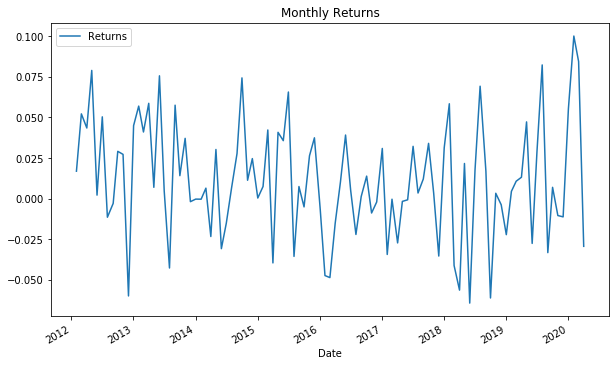

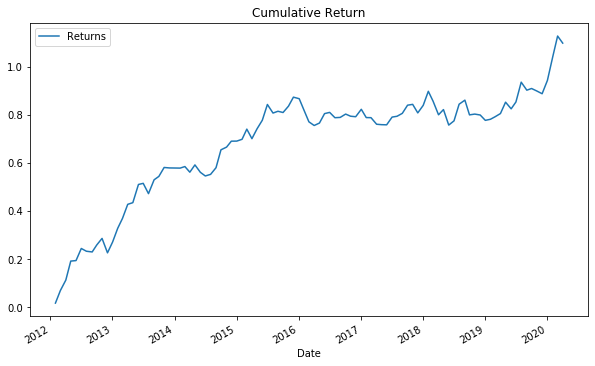

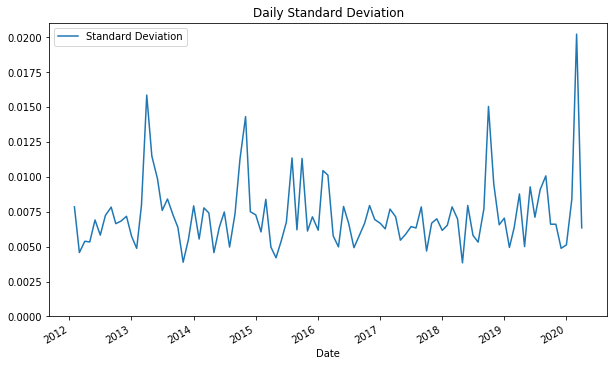

In [6]:
def perform(rets=monthlyReturn, sdev=standardDev): 
    if type(rets) == pd.DataFrame and type(sdev) == pd.DataFrame: 
        dfrets.plot(kind='line', x='Date', y='Returns', title='Monthly Returns', 
                    figsize=(10,6))
        cumu= pd.DataFrame(rets['Returns'].cumsum())
        cumu['Date'] = rets['Date']
        cumu.plot(kind='line', x='Date', y='Returns', title='Cumulative Return', 
                  figsize=(10,6))
        dfstd.plot(kind='line', x='Date', y='Standard Deviation', 
                   title='Daily Standard Deviation', figsize=(10,6), ylim=(0))
    
    else: 
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.plot(100 * rets)
        ax.set_xlabel('Month')
        ax.set_ylabel('Percent')
        ax.set_title('Monthly Returns')
        plt.show()

        riskMetricsNP(rets, 'Whole Portfolio', port=True)
        print('Cash: {}'.format(np.round(cash, 12)))

        fig2, ax2 = plt.subplots()
        ax2.plot(sdev)
        ax2.set_ylim(bottom=0)
        ax2.set_xlabel('Month')
        ax2.set_ylabel('SD')
        ax2.set_title('Portfolio Standard Deviation')
        plt.show()

        plotCumRets(100*np.array(rets))


dfrets = pd.DataFrame(monthlyReturn)
dfrets['Date'] = startH
dfrets['Date'] = pd.to_datetime(dfrets['Date'])
dfrets.columns = ['Returns', 'Date']
dfstd = pd.DataFrame(standardDev)
dfstd['Date'] = startH
dfstd['Date'] = pd.to_datetime(dfstd['Date'])
dfstd.columns = ['Standard Deviation', 'Date']

perform(dfrets, dfstd)
riskMetrics(monthlyReturn)

In [7]:
monthlyReturn

array([ 0.01686818,  0.05218386,  0.04347955,  0.07894651,  0.00212744,
        0.05034907, -0.01149286, -0.0029636 ,  0.02910517,  0.02722284,
       -0.05998076,  0.04493848,  0.05696991,  0.04102801,  0.0586848 ,
        0.00693453,  0.0756297 ,  0.00464104, -0.0427645 ,  0.05753365,
        0.0141133 ,  0.03710317, -0.00190532, -0.00032767, -0.00037753,
        0.00641852, -0.02337075,  0.03024618, -0.03085591, -0.01513884,
        0.0066196 ,  0.02775581,  0.07434467,  0.0112849 ,  0.02463056,
        0.0003391 ,  0.00744693,  0.04225662, -0.03963564,  0.04081069,
        0.03568275,  0.06564182, -0.03562321,  0.00741811, -0.00512734,
        0.02637448,  0.03743578, -0.00648798, -0.04743307, -0.04867158,
       -0.01527384,  0.01025934,  0.03914318,  0.00509123, -0.02210591,
        0.00127231,  0.01383428, -0.00888348, -0.00211552,  0.03088204,
       -0.03442496, -0.0003866 , -0.0273099 , -0.00173512, -0.0007542 ,
        0.0321796 ,  0.00343247,  0.01206324,  0.03401578,  0.00

In [8]:
cumRet(monthlyReturn)

array([0.        , 0.05218386, 0.09566341, 0.17460992, 0.17673735,
       0.22708642, 0.21559355, 0.21262996, 0.24173513, 0.26895797,
       0.2089772 , 0.25391568, 0.31088559, 0.3519136 , 0.4105984 ,
       0.41753294, 0.49316264, 0.49780367, 0.45503917, 0.51257282,
       0.52668612, 0.56378929, 0.56188396, 0.56155629, 0.56117877,
       0.56759729, 0.54422654, 0.57447272, 0.54361681, 0.52847796,
       0.53509756, 0.56285337, 0.63719804, 0.64848295, 0.6731135 ,
       0.67345261, 0.68089954, 0.72315615, 0.68352051, 0.7243312 ,
       0.76001395, 0.82565577, 0.79003256, 0.79745067, 0.79232333,
       0.81869781, 0.85613359, 0.84964561, 0.80221253, 0.75354095,
       0.73826711, 0.74852646, 0.78766963, 0.79276086, 0.77065495,
       0.77192725, 0.78576153, 0.77687805, 0.77476253, 0.80564457,
       0.77121961, 0.77083301, 0.74352311, 0.74178799, 0.74103379,
       0.7732134 , 0.77664586, 0.7887091 , 0.82272488, 0.82610973,
       0.79070657, 0.822042  , 0.88045141, 0.83921914, 0.78282

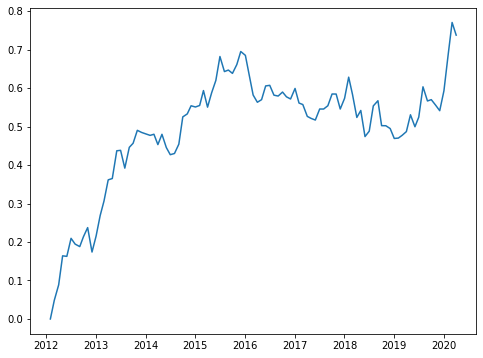

6.716884695329384

In [9]:
plt.figure(figsize=(8,6))
plt.plot(startH, cumRet(monthlyReturn-.0035))
plt.show()
100*((1+cumRet(monthlyReturn-.0035)[-1])**(1/8.5)-1)

## Get Weights

In [10]:
'''
Make one month iteration and return weights vector 
Return price vector also 
'''

def getWeights(i = len(winners)-1): 
    winners = dfList['Winners']
    losers = dfList['Losers']
    startH = dfList['StartH']
    endH = dfList['EndH']

    # Volatility scaling
    # Aiming for 12% annual volatility, which is 3.46% monthly
    targetSD = .0346

    listWin = strip_replace(winners[i])
    listLoss = strip_replace(losers[i])
    numWin = len(listWin)
    p = getCSVPrice(listWin[0], startH[i], endH[i])
    p_l = getCSVPrice(listLoss[0], startH[i], endH[i])
    
    # Tickers
    retWin = 0
    retLoss = 0
    prices = 10 * np.ones(len(tickers))
    for j in range(numWin):
        p = getCSVPrice(listWin[j], startH[i], endH[i])
        r = getCSVRet(listWin[j], startH[i], endH[i])
        retWin += r/len(listWin)
        k = tickers.index(listWin[j])
        prices[k] = p[len(p)-1]
        
        p_l = getCSVPrice(listLoss[j], startH[i], endH[i])
        r_l = getCSVRet(listLoss[j], startH[i], endH[i])
        retLoss += r_l/len(listLoss)
        k = tickers.index(listLoss[j])
        prices[k] = p_l[len(p_l)-1]

    # Momentum scaling
    retWinScale = pd.Series(dtype='float64')
    retLossScale = pd.Series(dtype='float64')
    for j in range(numWin): 
        pWin = getCSVPrice(listWin[j], startS[i], endS[i])
        if j == 0: 
            retWinScale = 0 * pd.Series(pWin)
            retLossScale = 0 * pd.Series(pWin)
        retWinScale += getCSVRet(listWin[j], startS[i], endS[i]) 
        pLoss = getCSVPrice(listLoss[j], startS[i], endS[i])
        retLossScale += getCSVRet(listLoss[j], startS[i], endS[i])
    scaleRet = (retWinScale - retLossScale) / len(listWin)
    totalVar = 0
    for j in range(len(scaleRet)):
        retj = float(scaleRet[j])
        totalVar += retj * retj
    monthlyVar = totalVar / 6
    monthlySD = np.sqrt(monthlyVar)
    momSD[i] = monthlySD
    wMo = targetSD / monthlySD

    pSPY = getCSVPrice('SPY', startH[i], endH[i])
    pSPY = pSPY[len(pSPY)-1]
    pVal = getCSVPrice('VTV', startH[i], endH[i])
    pVal = pVal[len(pVal)-1]
    
    wMo *= .5
    # wHedge = .5
    wHedge = 1 - wMo
    cash = .5-wMo
    
    # Weights vector 
    weights = np.zeros(len(tickers))
    for k in range(numWin): 
        j = tickers.index(listWin[k])
        weights[j] = 0.0625 * wMo
    for k in range(numWin): 
        j = tickers.index(listLoss[k])
        weights[j] = -0.0625 * wMo
    
    # Hedge weights 
    prices[len(prices)-2] = pVal
    prices[len(prices)-1] = pSPY
    weights[len(weights)-2] = wHedge / 2
    weights[len(weights)-1] = - wHedge / 2
    
    dfWeights = pd.DataFrame(tickers, columns=['Ticker'])
    dfWeights['Weight'] = weights
    dfWeights['Value'] = 10000 * dfWeights['Weight']
    dfWeights['Num. Shares'] = dfWeights['Value'] / prices
    dfWeights['Price'] = prices
    
    return dfWeights

getWeights()[getWeights()['Value'] != 0]

,Ticker,Weight,Value,Num. Shares,Price
2,PBD,0.011809,118.092950,8.819488,13.390000
3,TAN,0.011809,118.092950,3.920749,30.120001
11,PXE,-0.011809,-118.092950,-11.680806,10.110000
13,PXJ,-0.011809,-118.092950,-49.618884,2.380000
30,GDX,0.011809,118.092950,3.660662,32.259998
32,KOL,-0.011809,-118.092950,-1.806808,65.360001
34,XME,-0.011809,-118.092950,-6.109309,19.330000
44,GRID,0.011809,118.092950,2.400751,49.189999
45,VTV,0.405526,4055.256404,41.145054,98.559998
46,SPY,-0.405526,-4055.256404,-13.960535,290.480011


## Reweighting 

In [11]:
## DOES NOT INCLUDE EFFECTS OF RETURNS DURING THE MONTH 

def changeWeights(iMinus = len(winners) - 2, i = len(winners) - 1): 
    pdiMinus = getWeights(iMinus)
    pdi = getWeights(i)
    pdi.iloc[:, 1:] -= pdiMinus.iloc[:, 1:]
    return pdi

changeWeights()[changeWeights()['Value'] != 0]

,Ticker,Weight,Value,Num. Shares,Price
2,PBD,0.011809,118.092950,8.819488,3.390000
3,TAN,-0.004781,-47.806339,-2.654729,4.890001
9,XHB,-0.016590,-165.899289,-5.568959,-19.790001
11,PXE,0.004781,47.806339,16.015236,4.120000
13,PXJ,0.004781,47.806339,39.574281,0.520000
30,GDX,-0.004781,-47.806339,-3.539828,9.219997
32,KOL,0.004781,47.806339,0.830701,2.459999
34,XME,0.004781,47.806339,4.175830,3.200001
39,PSI,-0.016590,-165.899289,-3.052987,-44.340000
44,GRID,0.011809,118.092950,2.400751,39.189999


## Fees 

In [12]:
# Making the portfolio in the first month
'''
Volume
0.0035$ per share
0.35$ < fee < 1% of trade value
1% if fee < 0.35$, so if < 100 shares

No sales, so no transaction costs
Unclear as to pass-through fees, assumed to apply to purchases
0.0035*0.000175* number of shares

Clearing
0.0002$ per share

Exchange
0.003$ per quote driven order
-0.002$ per order driver order (a rebate)

'''


#Â Assumed all trades are either quote or order, can make a vector otherwise
#Â Is the short classed as a sale, hence giving transaction costs?
#Â Do we only buy and sell ETFs in whole numbers?
#Â Requires positions as a vector of weights, prices and the stocks in the same order
totalShares = 0
def firstTime(positions, prices=1, quoteDriven=True, liquidity=10000, rebalance=False):
    #Â This may not like the short
    absPos = np.zeros(len(positions))
    for i in range(len(absPos)):
        absPos[i] = positions[i]
        if positions[i] < 0:
            absPos[i] = positions[i] * -1
        
    if rebalance == False and sum(absPos) != 0 and sum(absPos) != 1:
        sumPos = sum(absPos)
        for i in range(len(positions)):
             positions[i] /= sumPos
        print('Reweighted: {}'.format(positions))

    if type(prices) == int and prices == 1:
        prices = 10 * np.ones(len(positions))
    else:
        print('Prices: {}'.format(prices))

    numShares = 0
    p = 1
    val = 0
    volume = np.zeros(len(positions))
    trans = np.zeros(len(positions))
    passThru = np.zeros(len(positions))
    clearing = np.zeros(len(positions))
    exchange = np.zeros(len(positions))
    totalShares = 0

    for i in range(len(positions)):
        w = absPos[i]
        p = prices[i]
        val = liquidity * w
        numShares = val / p
        totalShares += numShares
        volume[i] = 0.0035 * numShares
        if volume[i] < 0.35: 
            volume[i] = 0.35 
        if val / 100 < 0.35: 
            volume[i] = val / 100 
        if positions[i] < 0:
            trans[i] = 0.0000207 * val
        else:
            trans[i] = 0
        passThru[i] = 0.0000006125 * numShares # 0.0035 * 0.000175
        clearing[i] = 0.002 * numShares
        if absPos[i] > 0: 
            if quoteDriven:
                exchange[i] = 0.003
            else:
                exchange[i] = -0.002
    
    totalVolume = round(sum(volume), 10)
    totalTrans = round(sum(trans), 10)
    totalPass = round(sum(passThru), 10)
    totalClearing = round(sum(clearing), 10)
    totalExchange = round(sum(exchange), 10)
    fees = [totalVolume, totalTrans, totalPass, totalClearing, totalExchange]
    totalFee = round(sum(fees),10)
    print('Fees: ')
    print(fees)
    print('\nTotal fee: $ {}'.format(totalFee))
    print('Fee percentage: {} %\n'.format(totalFee/liquidity))

    return totalFee

## wMo 

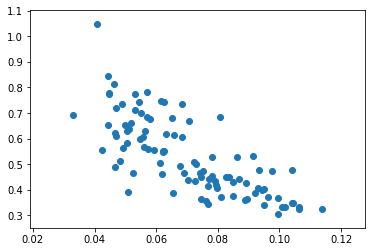

In [13]:
l = momSD
m = pd.DataFrame(momWeight).shift(1)
plt.scatter(l[1:], m[1:])
# Looks as if there is an inverse relationship between SD 
# risk and return for the momentum arm 

In [14]:
sharpe = (monthlyReturn.mean()*12)/(standardDev.mean()*np.sqrt(252))
sharpe

1.1499952532204905

In [15]:
frameWinLos = dfList; frameWinLos['Hedge'] = hedgeWeight
frameWinLos = pd.DataFrame.set_index(frameWinLos, frameWinLos['EndH'])
x = pd.DataFrame(momWeight, index=endH); x = x.rename(columns={0:"Momentum_Weights"})
x['Winners_Returns'] = g_win; x['Losers_Returns'] = g_los 
x['Hedge_Weight'] = frameWinLos['Hedge']
x['VTV_Return'] = g_val; x['SPY_Return'] = g_spy 
x['Winners'] = frameWinLos['Winners']; x['Losers'] = frameWinLos['Losers']
x = pd.DataFrame.sort_index(x, ascending=False)
x['Risk_Metrics'] = 'Risk metrics for Whole Portfolio, Average return: 0.414307%, SD: 0.01645, SemiSD: 0.00956, Max DD: 7.71%, VaR at 5%: 2.314%, CVaR at 5%: 2.695%, Skewness: 0.04543, Excess Kurtosis: -0.543714'
x['Risk_Metrics'].iloc[1:] = ''
# x.to_excel("Momentum_with_VTV_SPY_Hedge.xlsx")
y = pd.DataFrame(monthlyReturn, index=endH); y = y.rename(columns={0:"Strategy_Returns"})
x.head()

# Amend end cell for easier reading by text to columns and then transpose 

/Users/Chris/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Momentum_Weights,Winners_Returns,Losers_Returns,Hedge_Weight,VTV_Return,SPY_Return,Winners,Losers,Risk_Metrics
EndH,,,,,,,,,
2020-04-30,0.378345,0.199457,0.247325,0.621655,0.101355,0.119545,"['TAN', 'GDX', 'GRID', 'PBD']","['XME', 'KOL', 'PXE', 'PXJ']","Risk metrics for Whole Portfolio, Average retu..."
2020-03-31,0.531507,-0.248643,-0.431384,0.468493,-0.160494,-0.133384,"['TAN', 'PSI', 'XHB', 'GDX']","['XME', 'PXE', 'KOL', 'PXJ']",
2020-02-28,0.682141,0.017018,-0.138950,0.317859,-0.102180,-0.082475,"['TAN', 'PSI', 'GRID', 'PBD']","['NLR', 'PXE', 'PXJ', 'KOL']",
2020-01-31,0.390055,0.011887,-0.168782,0.609945,-0.025350,-0.000404,"['GDXJ', 'GDX', 'TAN', 'XHB']","['PJP', 'KOL', 'PXE', 'PXJ']",
2019-12-31,0.360267,0.070919,0.097645,0.639733,0.026082,0.028641,"['TAN', 'GDX', 'GDXJ', 'XHB']","['SLX', 'KOL', 'PXE', 'PXJ']",


In [16]:
def modelMonth(i = len(winners)-1): 
    modelRet = np.zeros(len(tickers))
    for j in range(len(tickers)): 
        modelRet[j] = sum(getCSVRet(tickers[j], startH[i], endH[i]))
    return modelRet

In [17]:
rightRet = pd.read_excel('Momentum_with_VTV_SPY_Hedge.xlsx', usecols=[0, 9])
rightRet['EndH'] = pd.to_datetime(rightRet['EndH'], format='%d/%m/%Y')
rightRet

,EndH,Momentum_Return
0,2019-12-31,-0.008668
1,2019-11-29,-0.004672
2,2019-10-31,0.004368
3,2019-09-30,-0.020852
4,2019-08-30,0.043246
...,...,...
90,2012-06-29,-0.001590
91,2012-05-31,0.041818
92,2012-04-30,0.024181
93,2012-03-30,0.019018


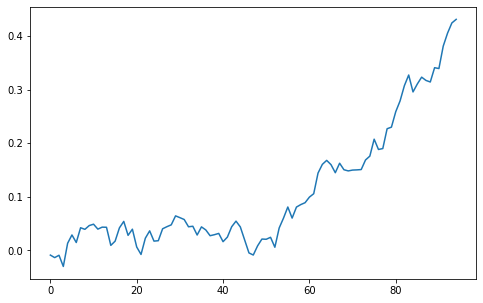

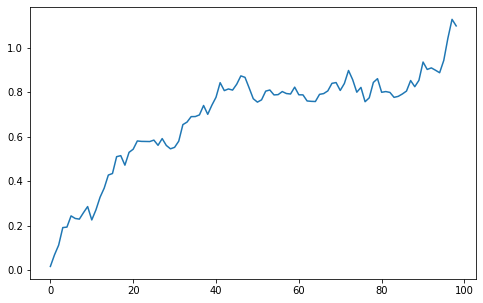

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(rightRet['Momentum_Return'].cumsum()[::-1])
plt.figure(figsize=(8, 5))
plt.plot(monthlyReturn.cumsum())

In [19]:
dfList = pd.read_csv(open('WML_Old.csv')).dropna()
dfList['StartF'].duplicated().sum()

0

0.6152275208298749

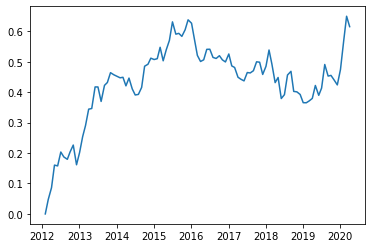

In [20]:
plt.plot(startH, cumRet(monthlyReturn-.00475))
# At 0.475% monthly cost, we breakeven 
cumRet(monthlyReturn-.00475)[-1]

In [21]:
import old_strategy_get_universe

ModuleNotFoundError: No module named 'old_strategy_get_universe'

In [48]:
portRets = pd.DataFrame(pd.concat([startH, pd.DataFrame(monthlyReturn)], axis=1))
portRets.columns = ['StartH', 'FullPort']
portRets.to_csv('FullRet.csv', index=False)

In [50]:
portRets

,StartH,FullPort
0,2012-02-01,0.016868
1,2012-03-01,0.052184
2,2012-04-02,0.043480
3,2012-05-01,0.078947
4,2012-06-01,0.002127
...,...,...
94,2019-12-02,-0.011266
95,2020-01-02,0.055255
96,2020-02-03,0.100129
97,2020-03-02,0.084427
